Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.8897 - loss: 0.3624 - val_accuracy: 0.9837 - val_loss: 0.0554
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9825 - loss: 0.0555 - val_accuracy: 0.9855 - val_loss: 0.0414
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9889 - loss: 0.0367 - val_accuracy: 0.9875 - val_loss: 0.0380
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9914 - loss: 0.0281 - val_accuracy: 0.9898 - val_loss: 0.0318
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9939 - loss: 0.0208 - val_accuracy: 0.9900 - val_loss: 0.0305
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9899 - loss: 0.0294
Test Accuracy: 0.9900


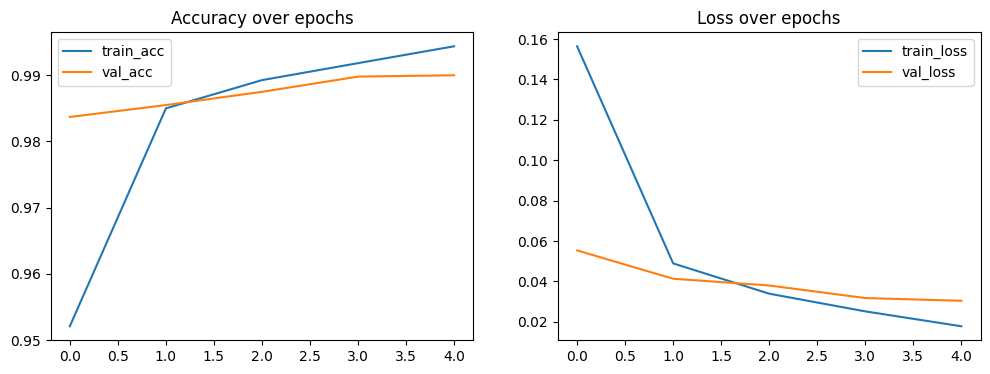

Saving test_image.png to test_image.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


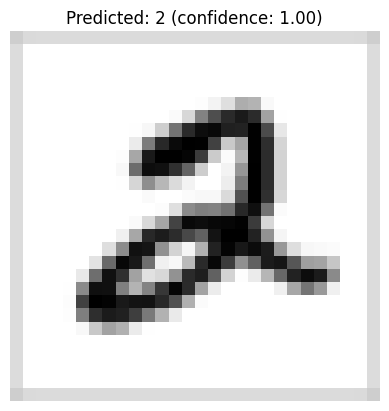

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset from TFDS
dataset, info = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

# Preprocessing: normalize images
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255.0, label

BATCH_SIZE = 64
train_dataset = train_dataset.map(normalize_img).cache().shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.map(normalize_img).batch(BATCH_SIZE).cache().prefetch(tf.data.AUTOTUNE)

# Build CNN Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train Model
history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)

# Evaluate on test dataset
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy over epochs')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()

# Real-time Testing Cell
# You can upload an image or draw in PIL and test

def predict_custom_image():
    from PIL import Image
    import io
    from google.colab import files

    uploaded = files.upload()
    for fn in uploaded.keys():
        img = Image.open(fn).convert('L').resize((28, 28))
        img_array = np.array(img)
        img_array = 255 - img_array  # invert if background is white
        img_array = img_array / 255.0
        img_array = img_array.reshape(1, 28, 28, 1)
        prediction = model.predict(img_array)
        predicted_class = np.argmax(prediction)
        confidence = np.max(prediction)
        plt.imshow(img, cmap='gray')
        plt.title(f'Predicted: {predicted_class} (confidence: {confidence:.2f})')
        plt.axis('off')
        plt.show()


predict_custom_image()
